<a href="https://colab.research.google.com/github/Chintan-99/practice/blob/main/MLP_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set used in this notebook can be found at the following link:
https://drive.google.com/drive/u/1/folders/1HbSr_zWEk7ZXZQWxuKbfbPtiilhCIVu1 \
Please use IITM Email ID to access it.

**Here is a small description of the dataset:**\
**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# We need to predict weather a passenger was **Transported** or not.

In [ ]:
# Import Libraries
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Read the data and take out the target column from the data.


In [ ]:
data = pd.read_csv('/train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
y = data['Transported']
X = data.drop(columns = ['Transported'],axis=1)

Question 1: What wil be the shape of the feature matrix and the target column?

In [ ]:
X.shape, y.shape

((8693, 13), (8693,))

Question 2: How many total NaN values are there in the column 'Age'?

In [ ]:
X.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

### Task 2: Split the data into training and test splits. Keep the random_state to be 42 and test size to be 0.2

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,random_state = 42)

Question 3: What is the shape of the training data?

In [ ]:
xtrain.shape

(6954, 13)

### Task 3: Take the shopping mall column from the training data and add 1 to each entry, then apply a log transformation to the entire column and plot a histogram. **Note**: Do not change the values of 'ShoppingMall' in the original Data.

(array([4.59e+03, 2.05e+02, 2.15e+02, 2.68e+02, 2.88e+02, 3.41e+02,
        6.33e+02, 2.10e+02, 3.60e+01, 3.00e+00]),
 array([ 0.        ,  1.00644578,  2.01289156,  3.01933734,  4.02578311,
         5.03222889,  6.03867467,  7.04512045,  8.05156623,  9.05801201,
        10.06445778]),
 <a list of 10 Patch objects>)

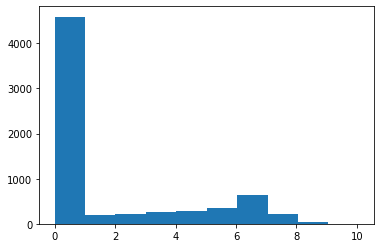

In [ ]:
from sklearn.preprocessing import FunctionTransformer

plt.hist(np.log(xtrain['ShoppingMall'] + 1))

Question 4: Which bin approximately has the highest number of data points in it?
1. (0, 1)
2. (4, 5)
3. (7, 8)
4. (9, 10)

In [ ]:
# Answer --> 1.(0,1)

### Task 4: Initialize 2 Imputer's from sklearn
1. SimpleImputer - For the categorical features.
2. KNNImputer - For the numerical features.

Apply both imputers to the respective columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_cols = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
ssi = SimpleImputer(strategy = 'most_frequent')
knni = KNNImputer(n_neighbors = 7)
xtrain[cat_cols] = ssi.fit_transform(xtrain[cat_cols])
xtrain[num_cols] = knni.fit_transform(xtrain[num_cols])

Question 4: How many NaN values are left in the training data after the Imputation?
1.  1
2.  0
3.  4
4.  5

In [ ]:
pd.isnull(xtrain).sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

### Task 5: Initialize a Standard Scaler object and apply it to the training data.

In [ ]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
xtrain[num_cols] = ssc.fit_transform(xtrain[num_cols])

Question 5: What is the minimum and maximum value present in the FoodCourt Column?

In [ ]:
train_pd = pd.DataFrame(xtrain)
train_pd[num_cols].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6.954000e+03,6.954000e+03,6.954000e+03,6.954000e+03,6.954000e+03,6.954000e+03
mean,-3.116416e-16,1.226131e-17,-2.273451e-17,4.597990e-17,5.313233e-17,-5.211055e-17
std,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00
min,-2.014845e+00,-3.314848e-01,-2.897805e-01,-2.866425e-01,-2.834173e-01,-2.595227e-01
25%,-6.166501e-01,-3.314848e-01,-2.897805e-01,-2.866425e-01,-2.834173e-01,-2.595227e-01
50%,-1.272818e-01,-3.314848e-01,-2.897805e-01,-2.866425e-01,-2.834173e-01,-2.595227e-01
75%,5.718159e-01,-2.527684e-01,-2.302320e-01,-2.356219e-01,-2.221055e-01,-2.137938e-01
max,3.508026e+00,2.104802e+01,1.746825e+01,3.837710e+01,1.646193e+01,2.056266e+01


In [ ]:
train_pd['FoodCourt'].max(), train_pd['FoodCourt'].min()

(17.468247149756866, -0.28978045317460327)

Question 5: How many categorical columns have more than 5 unique values?

In [ ]:
train_pd[cat_cols].describe()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,6954,6954,6954,6954,6954,6954,6954
unique,6954,3,2,5441,3,2,6785
top,2513_01,Earth,False,B/82/S,TRAPPIST-1e,False,Anton Woody
freq,1,3859,4554,165,4872,6798,161


### Task 6: Drop the columns which have more than 5 unqiue values. We won't use these columns as a feature in our model.

In [ ]:
xtrain.drop(['Cabin', 'Name', 'PassengerId'], axis = 1, inplace = True)

Question 6: What is the shape of the training data now?

In [ ]:
print(xtrain.shape)

(6954, 10)


### Task 7: Apply OneHotEncoding to all the categorical features. After applying the One Hot Encoding drop the original categorical features.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
columns_to_ohe = [x for x in cat_cols if x not in ('Cabin', 'Name', 'PassengerId')]
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
from sklearn.compose import ColumnTransformer
cl_ohe = ColumnTransformer([('nums', 'passthrough', num_cols),
                            ('cats', ohe, columns_to_ohe)])
xtrain_ = cl_ohe.fit_transform(xtrain)
# xtrain_cat_enc = ohe.fit_transform(xtrain[columns_to_ohe])
# print(xtrain[columns_to_ohe].shape, 'Before')
# print(xtrain_cat_enc.shape, 'enc shape')
# xtrain_ = xtrain.drop(columns_to_ohe, axis = 1)
# xtrain_.shape, 'Dropping'


# enc_columns = ohe.fit_transform(xtrain[columns_to_ohe])
# enc_df = pd.DataFrame(enc_columns, columns = ohe.get_feature_names_out())
# xtrain_ = xtrain.reset_index()
# xtrain_ = xtrain_.join(enc_df)
# #xtrain_ = xtrain_.set_index()

In [ ]:
pd.DataFrame(xtrain_).columns

RangeIndex(start=0, stop=16, step=1)

In [ ]:
xtrain_.get_feature_name()

AttributeError: ignored

In [ ]:
pd.DataFrame(xtrain_).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.057372,-0.331485,-0.254550,-0.286642,0.308062,-0.259523,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.826379,-0.331485,0.475679,-0.235622,-0.283417,-0.259523,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.057372,-0.331485,-0.289780,-0.286642,-0.283417,-0.259523,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,-0.616650,0.854430,-0.288499,0.189001,0.596588,-0.259523,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.501906,-0.331485,-0.289780,-0.286642,-0.283417,-0.259523,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


### Task 8: Now, apply all the transformations we applied to the training data to the test data too.

In [ ]:
# The Imputers.
xtest[cat_cols] = ssi.fit_transform(xtest[cat_cols])
xtest[num_cols] = knni.fit_transform(xtest[num_cols])

# The Scaler.
xtest[num_cols] = ssc.transform(xtest[num_cols])

# Remove Cabin and Name
xtest.drop(['Cabin', 'Name', 'PassengerId'], axis = 1, inplace = True)


# The Encoders
xtest_ = cl_ohe.fit_transform(xtest)

In [ ]:
xtest_.shape

(1739, 16)

Question 6: Out of all the numerical columns in the dataset which of them tends to follow the normal distribution most closely?

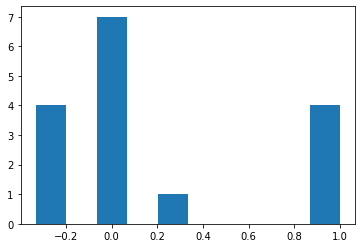

0


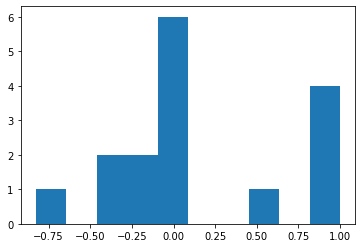

1


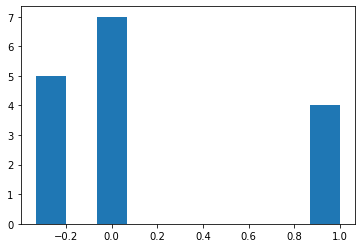

2


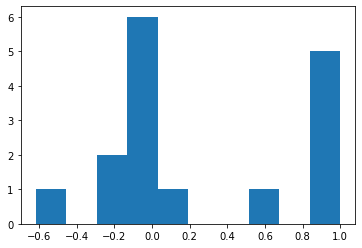

3


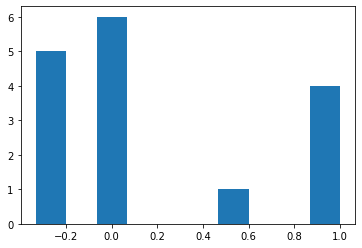

4


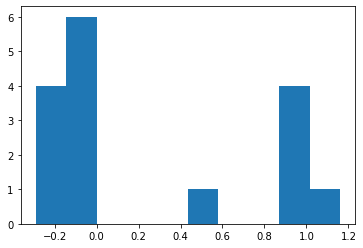

5


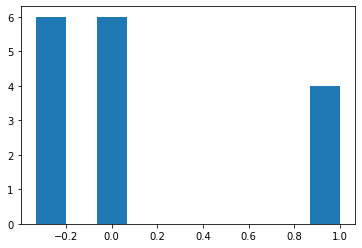

6


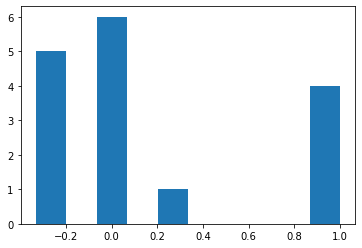

7


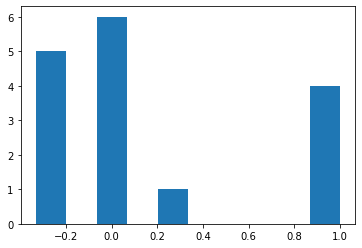

8


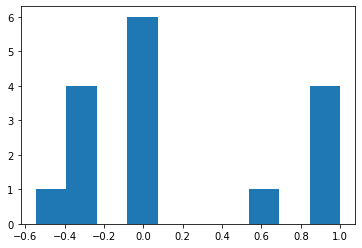

9


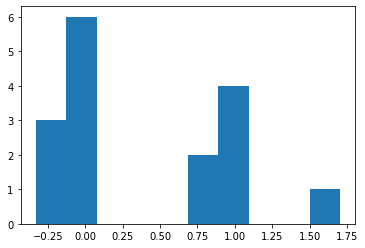

10


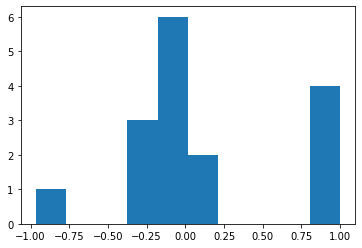

11


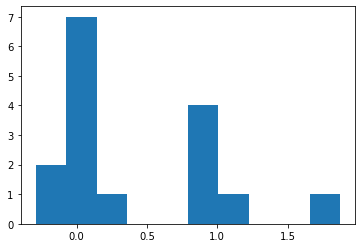

12


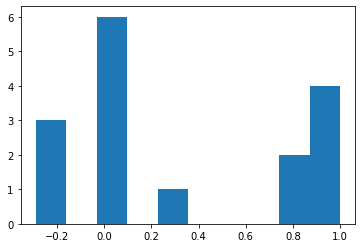

13


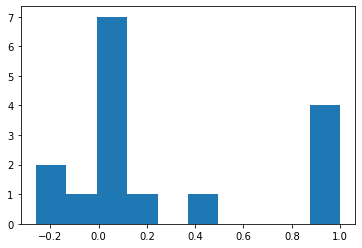

14


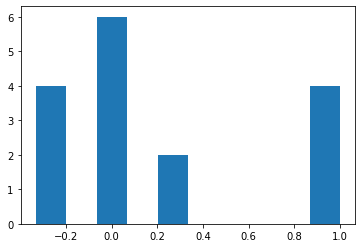

15


In [ ]:
%matplotlib inline
plot_pd = pd.DataFrame(xtrain_)
for i in plot_pd.columns:
  plt.hist(xtrain_[i])
  plt.show()
  print(i)

Question 7: What is the data type of the target column?

In [ ]:
ytrain.dtypes

dtype('bool')

### Task 9: Encode the target column in both training and testing data. Set it to 1 where it is true and 0 where it is False.

In [ ]:
ytrain = np.where(ytrain == True, 1, 0)
ytest = np.where(ytest == True, 1, 0)

# Now the data is ready for modelling!

### Task 10: Fit a default Perceptron model to the training data. Keep the random_state as 42.

In [ ]:
from sklearn.linear_model import Perceptron
model_1 = Perceptron()
model_1.fit(xtrain_, ytrain)
yhat = model_1.predict(xtest_)

Question 8: What is the model score on the training data and the accuracy on the testing dataset?

In [ ]:
from sklearn.metrics import accuracy_score
model_1.score(xtrain_, ytrain), accuracy_score(ytest, yhat)

(0.7684785734828875, 0.757906843013226)

### Task 10: Fit a Perceptron model with the following params
1. l2 penalty
2. alpha = 0.001
3. 3000 max interations

In [ ]:
model_2 = Perceptron(alpha=0.001, max_iter=3000, penalty='l2')
model_2.fit(xtrain_, ytrain)
yhat2 = model_2.predict(xtest_)

In [ ]:
model_2.score(xtrain_, ytrain), accuracy_score(ytest, yhat2)

(0.6988783433994823, 0.6912018401380103)

Question 9: Does this model perform better than the default model?
1. Yes
2. No

### Task 11: Fit a deafult Logistic regression model using SGD. Keep random_state = 42.

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42, loss = 'log')
sgd_reg = sgd.fit(xtrain_, ytrain)
yhat3 = sgd_reg.predict(xtest_)

Question 10: What is the accuracy of this model on the test dataset?

In [ ]:
sgd.score(xtrain_,ytrain), accuracy_score(ytest,yhat3)

(0.7907679033649698, 0.7786083956296722)

### Task 12: Fit a kmeans model to the Training data with the following parameters:
1. n_clusters = 4
2. random_state = 42

Store the output clusters as a new feature in the training data.
Predict the clusters for testing data and store them as a new feature too.

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(random_state=42, n_clusters=4)
km_reg = km.fit(xtrain_)
pdxtrain_ = pd.DataFrame(xtrain_)
pdxtest_ = pd.DataFrame(xtest_)
pdxtrain_['cluster_label'] = km_reg.labels_
pdxtest_['cluster_label'] = km_reg.predict(xtest_)

Question 11: What cluster labels are in the majority in the training data?

In [ ]:
pdxtrain_['cluster_label'].value_counts()

0    3939
1    2285
3     446
2     284
Name: cluster_label, dtype: int64

Question 11: What cluster labels are in the majority in the testing data? Is this cluster label the same as the training data?

In [ ]:
pdxtest_['cluster_label'].value_counts()

0    957
1    585
3    106
2     91
Name: cluster_label, dtype: int64

### Task 13: Fit a gradient boosting Classifier model to the new data. Keeping the parameters as follows:
1. learning_rate = 0.01
2. n_estimators = 500
3. maximum depth = 5
4. random_state = 42

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42, n_estimators =500, learning_rate = 0.01, max_depth=5)
gbc_c = gbc.fit(xtrain_,ytrain)
yhat4 = gbc_c.predict(xtest_)

Question 12: What is the training accuracy of the gradient boosting model?

In [ ]:
gbc.score(xtrain_,ytrain), accuracy_score(ytest,yhat4)

(0.8232671843543284, 0.7889591719378953)

Question 13: Plot a confusion matrix of the Gradient boosting classifier. What are the TP, TN, FP, FN values?

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,yhat4)


Question 14: What is the the AUC (Area under the Curve) metric for the GradientBoostingClassifier Model?